In [20]:
'''Numerical Study'''

import matplotlib.pyplot as plt

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

import numpy as np

import pandas as pd


In [21]:
# Policy='Stay'

Policy='Random_walk'

'''Load data'''

Order_df=pd.read_csv('./Data/NYC_Trips/Dispatched_Order_df_'+Policy+'.csv')

Order_df=Order_df.drop(columns=['Unnamed: 0'])

Driver_df=pd.read_csv('./Data/NYC_Trips/Dispatched_Driver_df_'+Policy+'.csv')

Driver_df=Driver_df.drop(columns=['Unnamed: 0'])

Quatitive_results=np.load('./Data/NYC_Trips/Quatitive_results'+Policy+'.npy',allow_pickle=True)



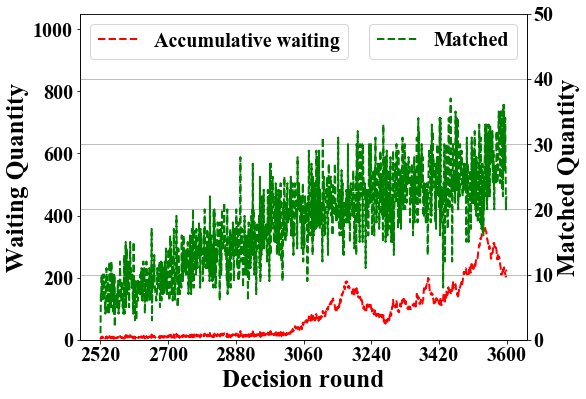

In [22]:
'''Figure'''

figsize = 8,6

font_label = {'family' : 'Times New Roman','weight' : 'normal','size': 25}

font_legend = {'family' : 'Times New Roman','weight' : 'normal','size': 20}

figure, ax1 = plt.subplots(figsize=figsize)

labels = ax1.get_xticklabels() + ax1.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

l1=ax1.plot(Quatitive_results[:,0], Quatitive_results[:,1],'r--',linewidth=2,label='Accumulative waiting')

ax2 = ax1.twinx()

labels = ax2.get_xticklabels() + ax2.get_yticklabels()

[label.set_fontsize(20) for label in labels]

[label.set_fontname('Times New Roman') for label in labels]

l2=ax2.plot(Quatitive_results[:,0], Quatitive_results[:,3],'g--',linewidth=2,alpha=1.0,label='Matched')


ax1.set_ylabel('Waiting Quantity',font_label)

ax1.set_xlabel('Decision round',font_label)

ax2.set_ylabel('Matched Quantity',font_label)

ax1.legend(loc = 'upper left',prop=font_legend)

ax2.legend(loc = 'upper right',prop=font_legend)

xmajorLocator   = MultipleLocator(180)

ax1.xaxis.set_major_locator(xmajorLocator) 

ax1.set_ylim([0,1050])

ax2.set_ylim([0,50])

plt.grid()

plt.show()

In [23]:
'''Served orders'''

print(Order_df.loc[(Order_df['Driver_id']!='Canceled')&(Order_df['Driver_id']!='Waiting')].shape[0])

print(Order_df.loc[(Order_df['Driver_id']!='Canceled')&(Order_df['Driver_id']!='Waiting')].shape[0]/22508)

print(Order_df.loc[(Order_df['Driver_id']=='Canceled')].shape[0])

print(Order_df.loc[(Order_df['Driver_id']=='Canceled')].shape[0]/22508)

print(Order_df.loc[(Order_df['Driver_id']=='Waiting')].shape[0])

print(Order_df.loc[(Order_df['Driver_id']=='Waiting')].shape[0]/22508)


19345
0.8594721876666074
2940
0.13062022392038386
223
0.009907588413008707


In [24]:
'''Average Response time'''

Order_Stat=Order_df.loc[(Order_df['Arrive_step']<=3600)&(Order_df['Driver_id']!='Canceled')&(Order_df['Driver_id']!='Waiting')]

Order_Stat['Response_time']=Order_Stat.apply(lambda x:(x['Response_step']-x['Arrive_step'])*10,axis=1)

Order_Stat=Order_Stat[['Order_id','Pickup_step','Response_time']]

Order_Stat['Response_time'].mean()


/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


13.643318686999224

In [25]:
'''Average Pick-up time'''

Order_Stat=Order_df.loc[(Order_df['Arrive_step']<=3600)&(Order_df['Driver_id']!='Canceled')&(Order_df['Driver_id']!='Waiting')]

Order_Stat['Pickup_time']=Order_Stat.apply(lambda x:(x['Pickup_step']-x['Response_step'])*10,axis=1)

Order_Stat=Order_Stat[['Order_id','Pickup_step','Pickup_time']]

Order_Stat['Pickup_time'].mean()



/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


156.53295425174463

In [26]:
'''Average Deadheading time'''

Order_Stat=Order_df.loc[(Order_df['Arrive_step']<=3600)&(Order_df['Driver_id']!='Canceled')&(Order_df['Driver_id']!='Waiting')]

Order_Stat['Deadheading_time']=Order_Stat.apply(lambda x:(x['Pickup_step']-x['Response_step'])*10,axis=1)

Order_Stat=Order_Stat[['Driver_id','Deadheading_time']]

Order_Stat=Order_Stat.groupby(['Driver_id']).mean()

Order_Stat['Deadheading_time'].mean()


/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


167.23431887780396

In [27]:
'''Average Occupied rate'''

Order_Stat=Order_df.loc[(Order_df['Arrive_step']<=3600)&(Order_df['Driver_id']!='Canceled')&(Order_df['Driver_id']!='Waiting')]

Get_duration=lambda x,y:int(y/10) if x+int(y/10)<=3600 else 3600-x

Order_Stat['duration']=Order_Stat.apply(lambda x:Get_duration(x['Pickup_step'],x['Travel_time']),axis=1)

Order_Stat['duration'].sum()/(3000*1080)



/Users/yueyang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0.49788117283950617